In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/data.csv")

df["x"] = (df["x"] - df["x"].mean())/df["x"].std()
df["y"] = (df["y"] - df["y"].mean())/df["y"].std()
df.rename(columns={"z": "class"}, inplace=True)
df["z"] = np.abs(df["x"])

In [3]:
df.head()

,x,y,class,z
0,-0.865433,1.650774,a,0.865433
1,-1.289086,2.049094,a,1.289086
2,-1.310905,2.056161,a,1.310905
3,-1.466780,2.335685,a,1.466780
4,-1.491990,2.073620,a,1.491990


In [4]:
import plotly.express as px

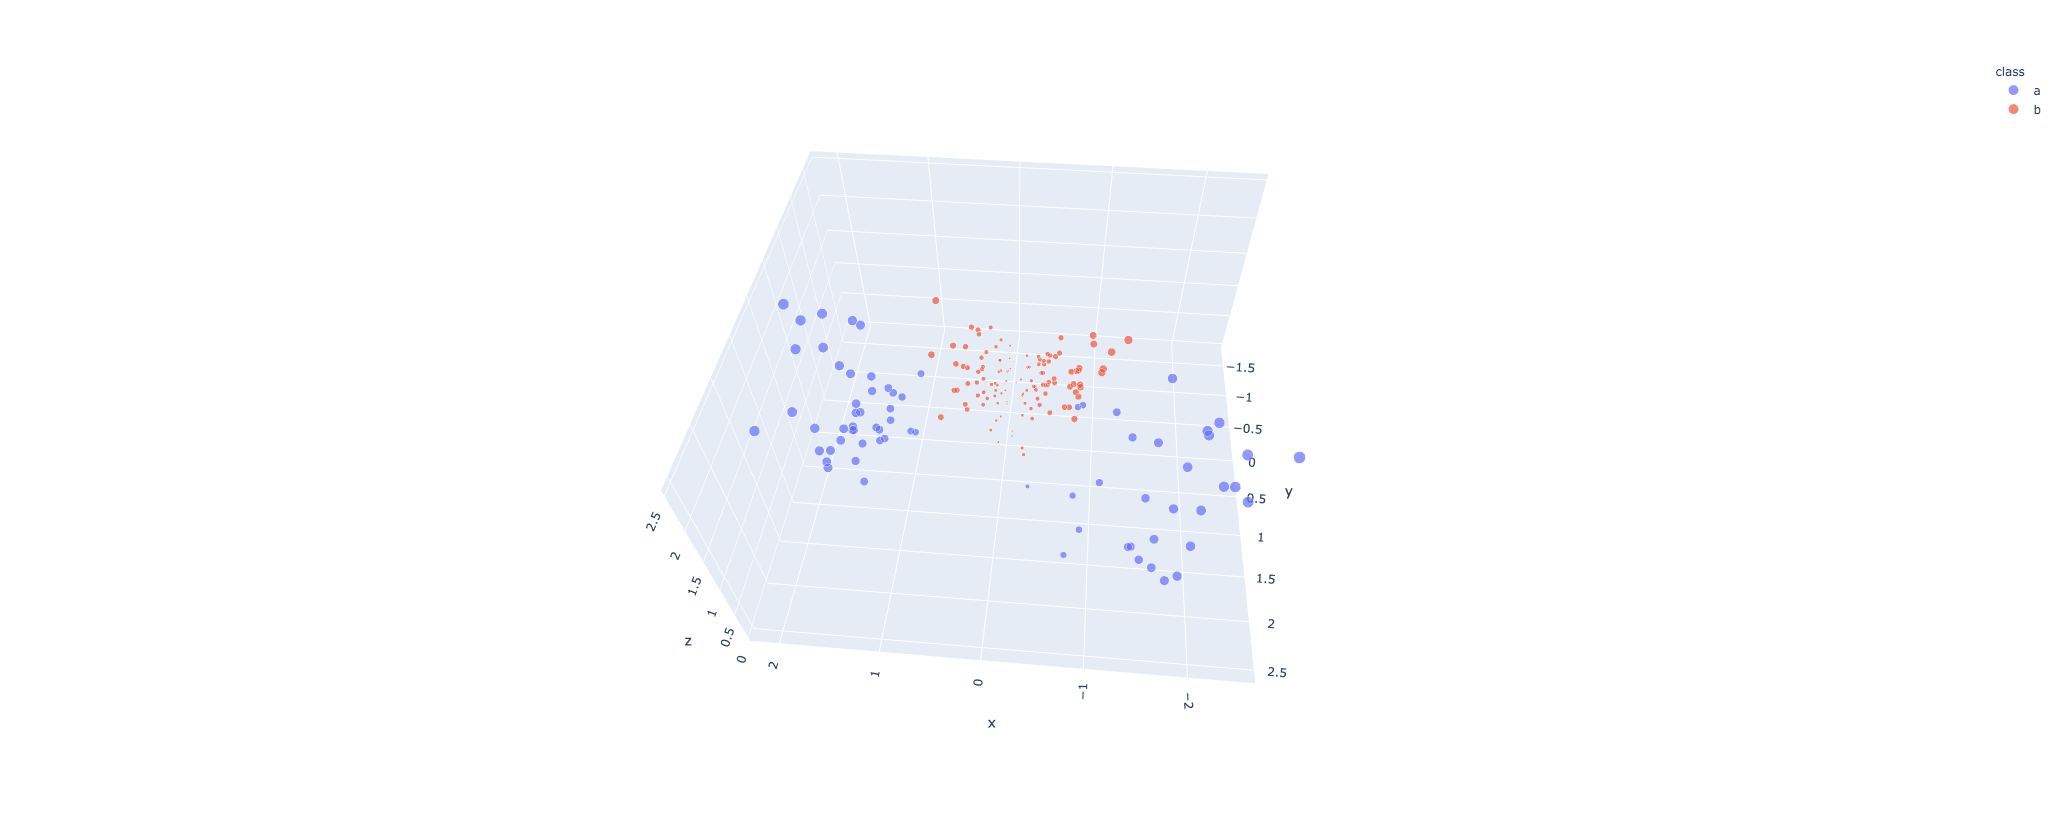

In [12]:
px.scatter_3d(df, x = df["x"], y = df["y"], z = df["z"], 
              color = "class", size = "z")

## Random Projection

In [13]:
X = df[["x", "y", "z"]].values

In [26]:
w = np.random.randn(2,3) 

In [27]:
z = X @ w.T

In [28]:
import seaborn as sns;

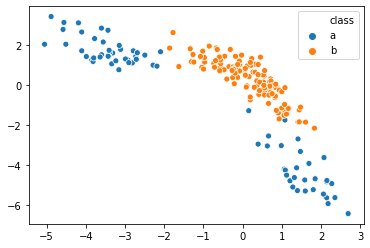

In [29]:
sns.scatterplot(x = z[:,0], y = z[:,1], hue = df["class"])

## PCA

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=3)

In [32]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
z = pca.transform(X)

In [34]:
X.shape

(193, 3)

In [35]:
z.shape

(193, 3)

In [36]:
pca.components_.shape

(3, 3)

In [37]:
pca.components_

array([[-0.38785065,  0.81918574,  0.42250042],
       [ 0.91873494,  0.30671247,  0.2487038 ],
       [-0.07414846, -0.48462583,  0.87157318]])

In [38]:
pca.explained_variance_

array([1.318298  , 0.94906499, 0.11093757])

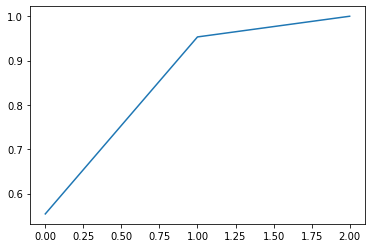

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [40]:
z_hat = (pca.components_ @ X.T).T

In [41]:
z_hat.shape

(193, 3)

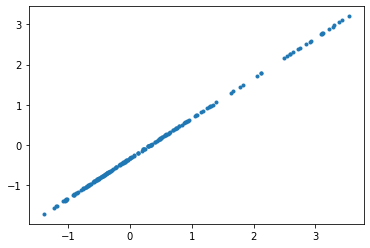

In [42]:
plt.plot(z_hat[:,0], z[:,0], '.')

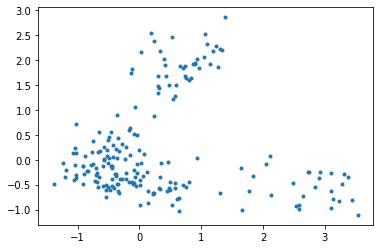

In [43]:
plt.plot(z_hat[:,0], z_hat[:,1], '.')

## MDS

In [44]:
from sklearn.manifold import MDS

In [46]:
mds = MDS(n_components=2)

In [49]:
mds.fit(X)

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=None, verbose=0)

In [51]:
z = mds.fit_transform(X)

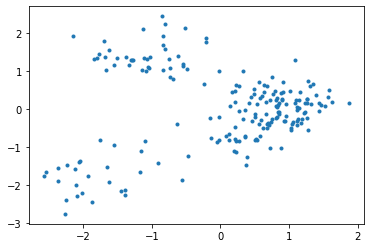

In [53]:
plt.plot(z[:,0], z[:,1], '.')

## T-SNE

In [ ]:
from sklearn.manifold import TSNE

# Synthetic data example 2

In [54]:
from sklearn.datasets import make_blobs

In [55]:
centers = [(0, 0), (0, 1), (1, 0)]
X, y = make_blobs(n_samples=500, centers=centers, shuffle=False,
                  random_state=42, cluster_std = .01)

In [56]:
df = pd.DataFrame(np.hstack((X, y[:,np.newaxis])), columns = ["x", "y", "class"])

df["class"] = df["class"].astype(int)
df.loc[df["class"]== 0, "class"] = "a"
df.loc[df["class"]== 1, "class"] = "b"
df.loc[df["class"]== 2, "class"] = "c"

Text(0, 0.5, 'x[2]')

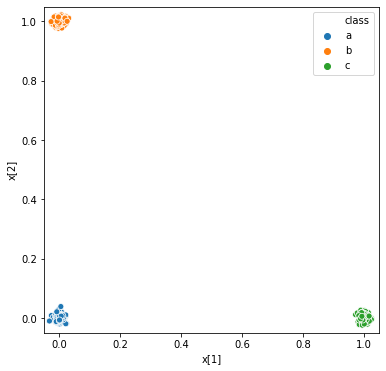

In [57]:
plt.figure(figsize=(6,6))
sns.scatterplot(df["x"], df["y"], hue = df["class"])
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05]);
plt.xlabel("x[1]")
plt.ylabel("x[2]")

## PCA

In [58]:
X = df[["x", "y"]].values

In [59]:
pca = PCA(n_components=1)

In [60]:
z = pca.fit_transform(X)

In [64]:
z.shape

(500, 1)

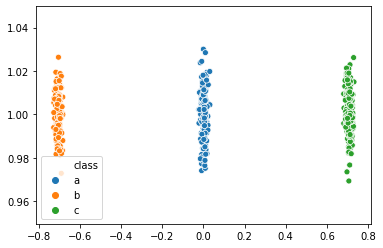

In [70]:
sns.scatterplot(y = np.ones(len(z)) + .01*np.random.randn(len(z)),
                x = z[:,0], hue = df["class"])

In [72]:
np.sqrt(2)/2

0.7071067811865476

## MDS

In [74]:
mds = MDS(n_components=1, dissimilarity="euclidean")

In [75]:
z = mds.fit_transform(X)

In [77]:
mds.n_iter_

12

In [78]:
mds

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
    n_components=1, n_init=4, n_jobs=None, random_state=None, verbose=0)

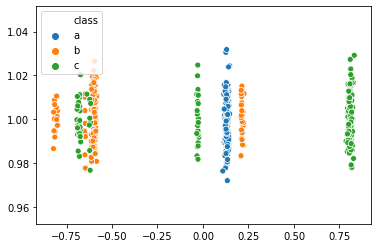

In [76]:
sns.scatterplot(y = np.ones(len(z)) + .01*np.random.randn(len(z)),
                x = z[:,0], hue = df["class"])

# T-SNE

In [80]:
from sklearn.manifold import TSNE

In [105]:
tsne = TSNE(n_components=1, perplexity=100)

In [106]:
z = tsne.fit_transform(X)

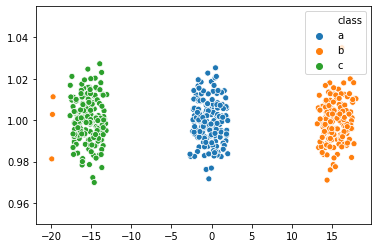

In [107]:
sns.scatterplot(y = np.ones(len(z)) + .01*np.random.randn(len(z)),
                x = z[:,0], hue = df["class"])

In [104]:
X.shape

(500, 2)

In [100]:
df["class"].value_counts()

b    167
a    167
c    166
Name: class, dtype: int64